<a href="https://colab.research.google.com/github/JavadJafari1367/ipynb/blob/main/Sa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


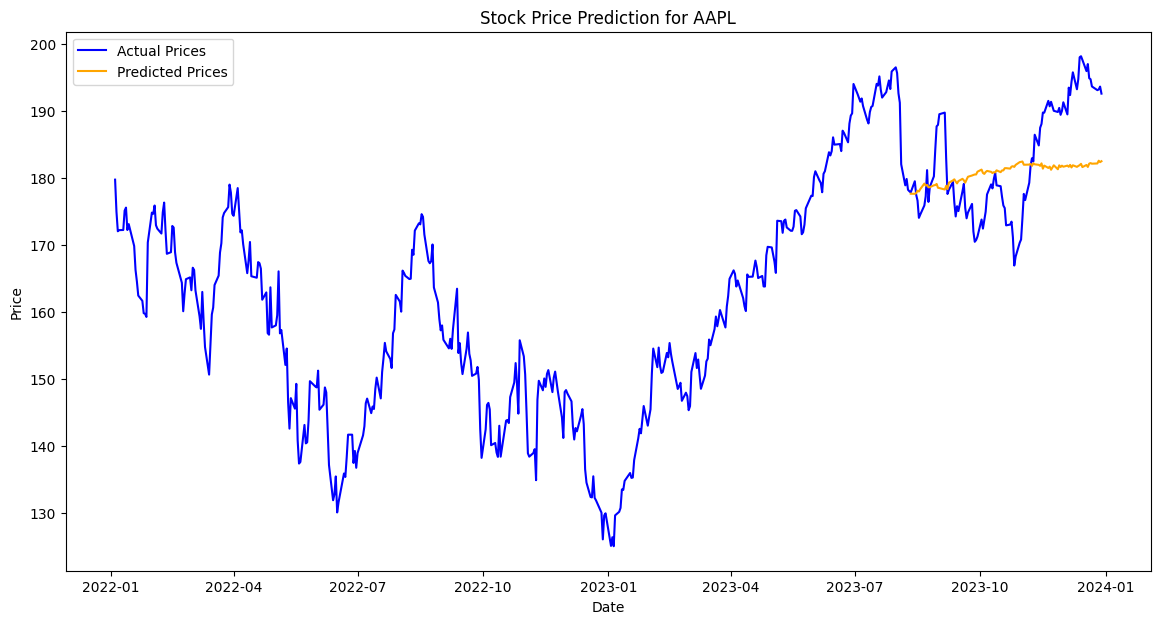

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# دریافت داده‌های قیمت
stock_symbol = 'AAPL'  # برای مثال، نماد اپل
stock_data = yf.download(stock_symbol, start='2022-01-01', end='2024-01-01')

# محاسبه درصد تغییرات
stock_data['Pct_Change'] = stock_data['Close'].pct_change()

# حذف ردیف‌های خالی
stock_data.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل
X = []
y = []

# استفاده از هر 10 روز برای ویژگی و درصد تغییر روز بعدی به عنوان هدف
for i in range(len(stock_data) - 10):
    X.append(stock_data['Pct_Change'].values[i:i + 10])  # درصد تغییرات 10 روز
    y.append(stock_data['Pct_Change'].values[i + 10])    # درصد تغییرات روز بعد

# تبدیل به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# مدل رگرسیون خطی
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی درصد تغییرات برای داده‌های آزمایشی
predicted_pct_change = model.predict(X_test)

# محاسبه قیمت‌های پیش‌بینی‌شده
last_price = stock_data['Close'].iloc[train_size + 10 - 1]
predicted_prices = [last_price]

i = 0;

for pct in predicted_pct_change:

    # next_price = stock_data['Close'].iloc[train_size + 10 - 1 + i] * (1 + pct)
    next_price = predicted_prices[-1] * (1 + pct)
    predicted_prices.append(next_price)
    i += 1

# ایجاد یک DataFrame برای نمایش نتایج
# ایجاد یک DataFrame برای نمایش نتایج
predicted_prices_df = pd.DataFrame(predicted_prices[1:], index=stock_data.index[train_size + 10:], columns=['Predicted_Price'])

# پلات کردن نتایج
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Prices', color='blue')
plt.plot(predicted_prices_df.index, predicted_prices_df['Predicted_Price'], label='Predicted Prices', color='orange')
plt.title(f'Stock Price Prediction for {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
print(stock_data['Pct_Change'])


Date
2022-01-04   -1.269160
2022-01-05   -2.659988
2022-01-06   -1.669334
2022-01-07    0.098836
2022-01-10    0.011619
                ...   
2023-12-22   -0.554750
2023-12-26   -0.284092
2023-12-27    0.051795
2023-12-28    0.222629
2023-12-29   -0.542413
Name: Pct_Change, Length: 500, dtype: float64


In [ ]:
Y_pred


array([156.50145704, 156.51015933, 156.78613539, 156.91192031,
       156.82466207, 156.85092707, 156.78871859, 156.8134728 ,
       156.79917185, 156.87666353, 156.96918013, 156.88870353,
       156.95104425, 156.9518111 , 157.0052861 , 156.97082222,
       157.1067564 , 157.09764559, 157.07363644, 156.80299337,
       156.59942   , 156.63272693, 156.62101986, 156.50585738,
       156.64259912, 156.84385183, 156.8058287 , 156.83812991,
       156.93093317, 156.88632014, 156.82112143, 156.875555  ,
       156.83990054, 156.67702488, 156.74702047, 156.80340013,
       156.79677151, 156.81064631, 156.87922536, 156.95832201,
       156.97932164, 157.02754127, 156.99149822, 157.01106332,
       157.02118619, 157.01561067, 156.90972088, 156.87774059,
       156.85576455, 156.7964843 , 156.7648039 , 156.74125019,
       156.75255104, 156.79959322, 156.76416761, 156.64709746,
       156.76860477, 156.80969795, 156.79442289, 156.91783616,
       157.11527572, 157.051479  , 157.06756871, 157.11

[*********************100%***********************]  1 of 1 completed
<ipython-input-47-4f99f3a2ac68>:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_test[9] = pct


[47.4691670593668, 46.95488901453899, 46.5948494212357, 46.60535042090641, 46.28635428743559, 47.143504053129426, 48.602498833258664, 48.34230532372945, 47.21393093404133, 46.9987119882149, 47.27886943447449, 46.76034678066134, 46.56906571342848, 46.90693424748573, 46.756345065998374, 46.819218591512374, 46.239104673969294, 46.24883693618761, 46.96740710566006, 46.64340747181637, 46.66952946464452, 47.369077267057776, 47.13600553305575, 46.796613230841196, 47.332419186038216, 46.65187176385946, 45.01956109652807, 45.750874167525176, 46.67884920433833, 45.691711644978625, 46.32857240512928, 47.57162368484707, 47.682861045667636, 46.95516203172075, 47.732496944742955, 47.87871467421974, 46.38341121728773, 46.6798317562816, 46.877772786654106, 46.361180140170035, 47.072971993690494, 47.440435933545686, 46.60082561773553, 46.504531735823846, 47.029000655339765, 46.71795483614385, 46.76268395073271, 47.239741141780925, 47.11705410861344, 47.12374235331702, 47.0966747236031, 47.0573824895544

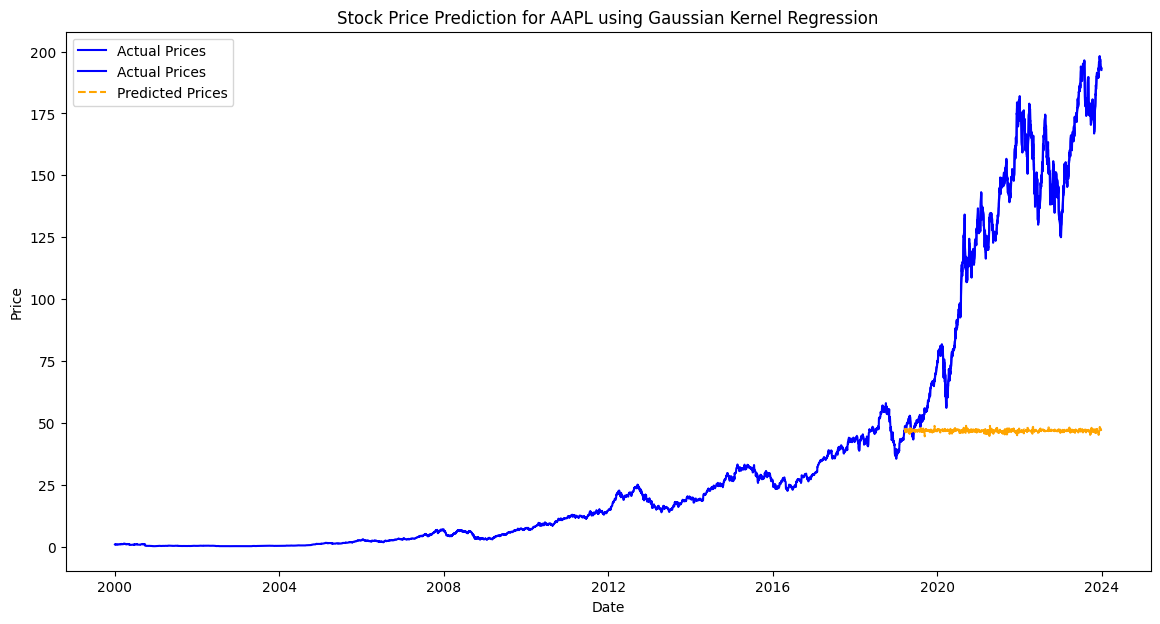

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# تابع کرنل گوسی
def gaussian_kernel(x, x_i, sigma):
    return np.exp(-0.5 * np.sum(((x - x_i) / sigma) ** 2, axis=1))

# تابع رگرسیون کرنل (Nadaraya-Watson)
def kernel_regression(X_train, y_train, X_test, sigma):
    y_pred = []
    for x_test in X_test:
        weights = gaussian_kernel(X_train, x_test, sigma)
        y_pred.append(np.sum(weights * y_train) / np.sum(weights))
    return np.array(y_pred)

# تابع رگرسیون کرنل (Nadaraya-Watson)
def kernel_regression_S(X_train, y_train, X_test, sigma):
    y_pred = []
    x_test = X_test
    weights = gaussian_kernel(X_train, x_test, sigma)
    y_pred.append(np.sum(weights * y_train) / np.sum(weights))
    return np.array(y_pred)


# دریافت داده‌های قیمت
stock_symbol = 'AAPL'  # برای مثال، نماد اپل
stock_data = yf.download(stock_symbol, start='2000-01-01', end='2024-01-01')

# محاسبه میانگین متحرک
window_size = 2  # تعداد روزهایی که برای محاسبه میانگین متحرک در نظر می‌گیریم
stock_data['Smoothed_Close'] = stock_data['Close'].rolling(window=window_size).mean()

# حذف مقادیر نان (NaN) اولیه که به دلیل محاسبه میانگین متحرک ایجاد شده‌اند
stock_data.dropna(inplace=True)

# محاسبه درصد تغییرات
stock_data['Pct_Change'] = stock_data['Smoothed_Close'].pct_change() * 100
stock_data.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل
X = []
y = []

# استفاده از هر 10 روز برای ویژگی و درصد تغییر روز بعدی به عنوان هدف
for i in range(len(stock_data) - 10):
    X.append(stock_data['Pct_Change'].values[i:i + 10])
    y.append(stock_data['Pct_Change'].values[i + 10])

# تبدیل به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# تنظیم سیگما (عرض کرنل)
sigma = 0.1  # مقدار قابل تنظیم

predicted_prices = []
x_test = np.zeros(10)
for i in range(10):
  x_test[i] = stock_data['Pct_Change'].values[train_size + i]

lastprice = stock_data['Smoothed_Close'].iloc[train_size + 10 - 1]
for i in range(test_size):

    pct = kernel_regression_S(X_train, y_train, x_test, sigma)
    next_price = lastprice * (1 + pct / 100)
    predicted_prices.append(next_price[0])
    x_test[0:9] = x_test[1:10]
    x_test[9] = pct


print(predicted_prices[1:])
# ایجاد DataFrame برای نمایش نتایج
predicted_prices_df = pd.DataFrame(predicted_prices, index=stock_data.index[train_size + 10:], columns=['Predicted_Price'])

# پلات کردن نتایج
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Prices', color='blue')
plt.plot(stock_data['Smoothed_Close'][predicted_prices_df.index], label='Actual Prices', color='blue')
plt.plot(predicted_prices_df.index, predicted_prices_df['Predicted_Price'], label='Predicted Prices', color='orange', linestyle='--')
plt.title(f'Stock Price Prediction for {stock_symbol} using Gaussian Kernel Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-57-b4993da055c7>:79: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_test[window_length-1] = pct


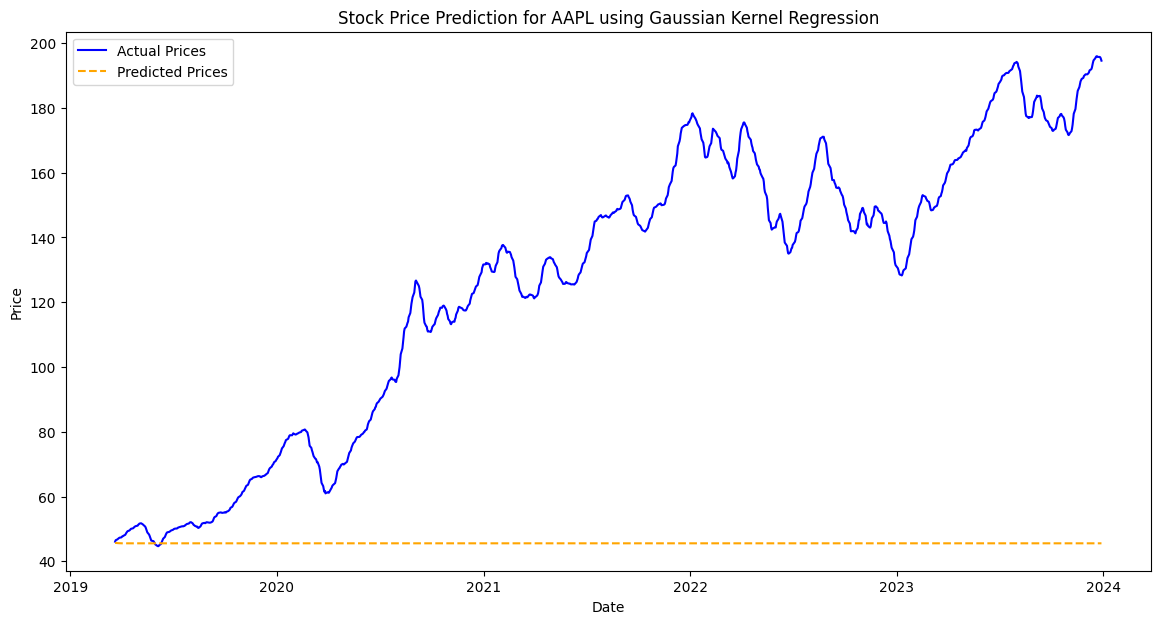

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# تابع کرنل گوسی
def gaussian_kernel(x, x_i, sigma):
    return np.exp(-0.5 * np.sum(((x - x_i) / sigma) ** 2, axis=1))

# تابع رگرسیون کرنل (Nadaraya-Watson)
def kernel_regression(X_train, y_train, X_test, sigma):
    y_pred = []
    for x_test in X_test:
        weights = gaussian_kernel(X_train, x_test, sigma)
        y_pred.append(np.sum(weights * y_train) / np.sum(weights))
    return np.array(y_pred)

# تابع رگرسیون کرنل (Nadaraya-Watson) برای داده‌های آزمایشی تکی
def kernel_regression_S(X_train, y_train, X_test, sigma):
    y_pred = []
    x_test = X_test
    weights = gaussian_kernel(X_train, x_test, sigma)
    y_pred.append(np.sum(weights * y_train) / np.sum(weights))
    return np.array(y_pred)

# دریافت داده‌های قیمت
stock_symbol = 'AAPL'  # برای مثال، نماد اپل
stock_data = yf.download(stock_symbol, start='2000-01-01', end='2024-01-01')

# محاسبه میانگین متحرک
window_size = 10  # تعداد روزهایی که برای محاسبه میانگین متحرک در نظر می‌گیریم
stock_data['Smoothed_Close'] = stock_data['Close'].rolling(window=window_size).mean()

# حذف مقادیر نان (NaN) اولیه که به دلیل محاسبه میانگین متحرک ایجاد شده‌اند
stock_data.dropna(inplace=True)

# محاسبه درصد تغییرات
stock_data['Pct_Change'] = stock_data['Smoothed_Close'].pct_change() * 100
stock_data.dropna(inplace=True)

# تنظیم تعداد روزهایی که برای ویژگی‌ها استفاده می‌شود
window_length = 10  # هر چند روز را به عنوان ویژگی در نظر بگیریم

# آماده‌سازی داده‌ها برای مدل
X = []
y = []

# استفاده از هر `window_length` روز برای ویژگی و درصد تغییر روز بعدی به عنوان هدف
for i in range(len(stock_data) - window_length):
    X.append(stock_data['Pct_Change'].values[i:i + window_length])
    y.append(stock_data['Pct_Change'].values[i + window_length])

# تبدیل به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# تقسیم داده‌ها به مجموعه‌های آموزشی و آزمایشی
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# تنظیم سیگما (عرض کرنل)
sigma = 1  # مقدار قابل تنظیم

predicted_prices = []
x_test = np.zeros(window_length)
for i in range(window_length):
    x_test[i] = stock_data['Pct_Change'].values[train_size + i]

lastprice = stock_data['Smoothed_Close'].iloc[train_size + window_length - 1]
for i in range(test_size):

    pct = kernel_regression_S(X_train, y_train, x_test, sigma)
    next_price = lastprice * (1 + pct / 100)
    predicted_prices.append(next_price[0])
    x_test[0:window_length-1] = x_test[1:window_length]
    x_test[window_length-1] = pct

# نمایش نتایج
predicted_prices_df = pd.DataFrame(predicted_prices, index=stock_data.index[train_size + window_length:], columns=['Predicted_Price'])

# پلات کردن نتایج
plt.figure(figsize=(14, 7))
# plt.plot(stock_data.index, stock_data['Close'], label='Actual Prices', color='blue')
plt.plot(stock_data['Smoothed_Close'][predicted_prices_df.index], label='Actual Prices', color='blue')
plt.plot(predicted_prices_df.index, predicted_prices_df['Predicted_Price'], label='Predicted Prices', color='orange', linestyle='--')
plt.title(f'Stock Price Prediction for {stock_symbol} using Gaussian Kernel Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


<ipython-input-59-4a335ca89b45>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=X_first_column, y=y, cmap="Blues", shade=True, thresh=0.05)


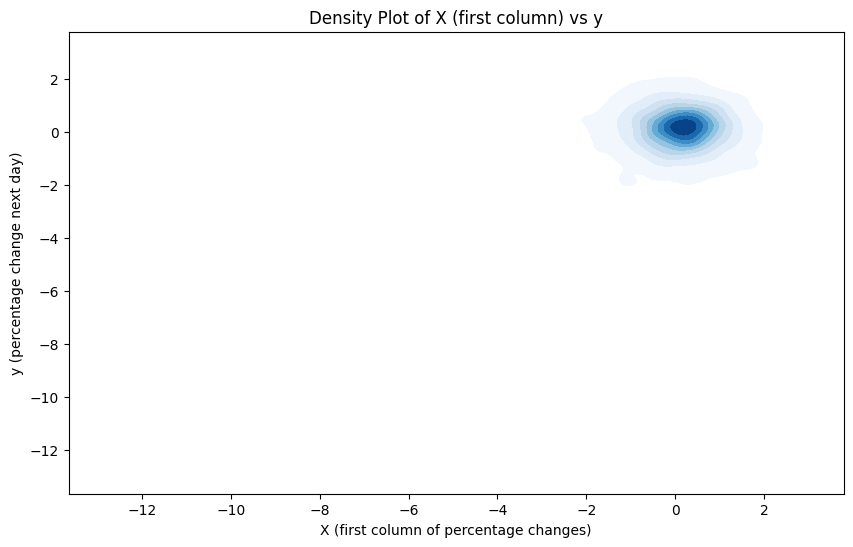

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# انتخاب اولین ستون X به عنوان ویژگی برای رسم
X_first_column = X[:, 0]  # اولین ستون از X

# رسم چگالی دو‌بعدی X و y با استفاده از KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(x=X_first_column, y=y, cmap="Blues", shade=True, thresh=0.05)
plt.title("Density Plot of X (first column) vs y")
plt.xlabel("X (first column of percentage changes)")
plt.ylabel("y (percentage change next day)")
plt.show()


In [ ]:
print(next_price[0])

193.8685740407454


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# تابع کرنل گوسی
def gaussian_kernel(x, x_i, sigma):
    return np.exp(-0.5 * np.sum(((x - x_i) / sigma) ** 2, axis=1))

# تابع رگرسیون کرنل (Nadaraya-Watson) برای داده‌های آزمایشی تکی
def kernel_regression_S(X_train, y_train, X_test, sigma):
    weights = gaussian_kernel(X_train, X_test, sigma)
    return np.sum(weights * y_train) / np.sum(weights)

# دریافت داده‌های قیمت
stock_symbol = 'AAPL'  # نماد اپل
stock_data = yf.download(stock_symbol, start='2000-01-01', end='2024-01-01')

# محاسبه میانگین متحرک
window_size = 2  # تعداد روزهایی که برای محاسبه میانگین متحرک در نظر می‌گیریم
stock_data['Smoothed_Close'] = stock_data['Close'].rolling(window=window_size).mean()

# حذف مقادیر نان (NaN) اولیه که به دلیل محاسبه میانگین متحرک ایجاد شده‌اند
stock_data.dropna(inplace=True)

# محاسبه درصد تغییرات
stock_data['Pct_Change'] = stock_data['Smoothed_Close'].pct_change() * 100
stock_data.dropna(inplace=True)

# تنظیم تعداد روزهایی که برای ویژگی‌ها استفاده می‌شود
window_length = 10  # هر چند روز را به عنوان ویژگی در نظر بگیریم

# آماده‌سازی داده‌ها برای مدل
X = []
y = []

# استفاده از هر `window_length` روز برای ویژگی و درصد تغییر روز بعدی به عنوان هدف
for i in range(len(stock_data) - window_length):
    X.append(stock_data['Pct_Change'].values[i:i + window_length])
    y.append(stock_data['Pct_Change'].values[i + window_length])

# تبدیل به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# تنظیم سیگما (عرض کرنل)
sigma = 0.1  # مقدار قابل تنظیم
lookback_period = 100  # تعداد روزهایی که به عنوان داده آموزشی استفاده می‌کنیم

predicted_prices = []
x_test = np.zeros(window_length)
for i in range(window_length):
    x_test[i] = stock_data['Pct_Change'].values[-test_size + i]

lastprice = stock_data['Smoothed_Close'].iloc[-test_size + window_length - 1]

# پیش‌بینی با استفاده از 100 روز گذشته
for i in range(test_size):
    # انتخاب آخرین 100 روز به عنوان داده آموزشی
    start_idx = max(0, train_size + i - lookback_period)
    end_idx = train_size + i
    X_train = X[start_idx:end_idx]
    y_train = y[start_idx:end_idx]

    pct = kernel_regression_S(X_train, y_train, x_test, sigma)
    next_price = lastprice * (1 + pct / 100)
    predicted_prices.append(next_price)

    # به روز رسانی x_test و lastprice
    x_test[0:window_length-1] = x_test[1:window_length]
    x_test[window_length-1] = pct
    lastprice = next_price

# تنظیم تعداد پیش‌بینی‌ها و تعداد شاخص‌ها
predicted_prices = np.array(predicted_prices)
num_predictions = len(predicted_prices)
corrected_index = stock_data.index[train_size + window_length:train_size + window_length + num_predictions]

# ایجاد DataFrame با استفاده از تعداد صحیح شاخص‌ها
predicted_prices_df = pd.DataFrame(predicted_prices, index=corrected_index, columns=['Predicted_Price'])

# پلات کردن نتایج
plt.figure(figsize=(14, 7))
# plt.plot(stock_data.index, stock_data['Close'], label='Actual Prices', color='blue')
plt.plot(stock_data['Smoothed_Close'][predicted_prices_df.index], label='Actual Prices', color='blue')
plt.plot(predicted_prices_df.index, predicted_prices_df['Predicted_Price'], label='Predicted Prices', color='orange', linestyle='--')
plt.title(f'Stock Price Prediction for {stock_symbol} using Gaussian Kernel Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



[*********************100%***********************]  1 of 1 completed


NameError: name 'train_size' is not defined